In [22]:
# ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics

# for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [19]:
# Load Boston Data and Check Data
df = pd.read_csv("Price.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1   CRIM     495 non-null    float64
 2   ZN       506 non-null    object 
 3   INDUS    473 non-null    float64
 4   CHAS     506 non-null    object 
 5   NOX      506 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      449 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        504 non-null    float64
 13  LSTAT    489 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 55.5+ KB


,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,'18',2.31,'0',0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,'0',7.07,'0',0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,'0',7.07,'0',0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,'0',2.18,'0',0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,'0',2.18,'0',0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33


Price       0
CRIM       11
ZN          0
INDUS      33
CHAS        0
NOX         0
RM          2
AGE         0
DIS        57
RAD         0
TAX         0
PTRATIO     0
B           2
LSTAT      17
dtype: int64

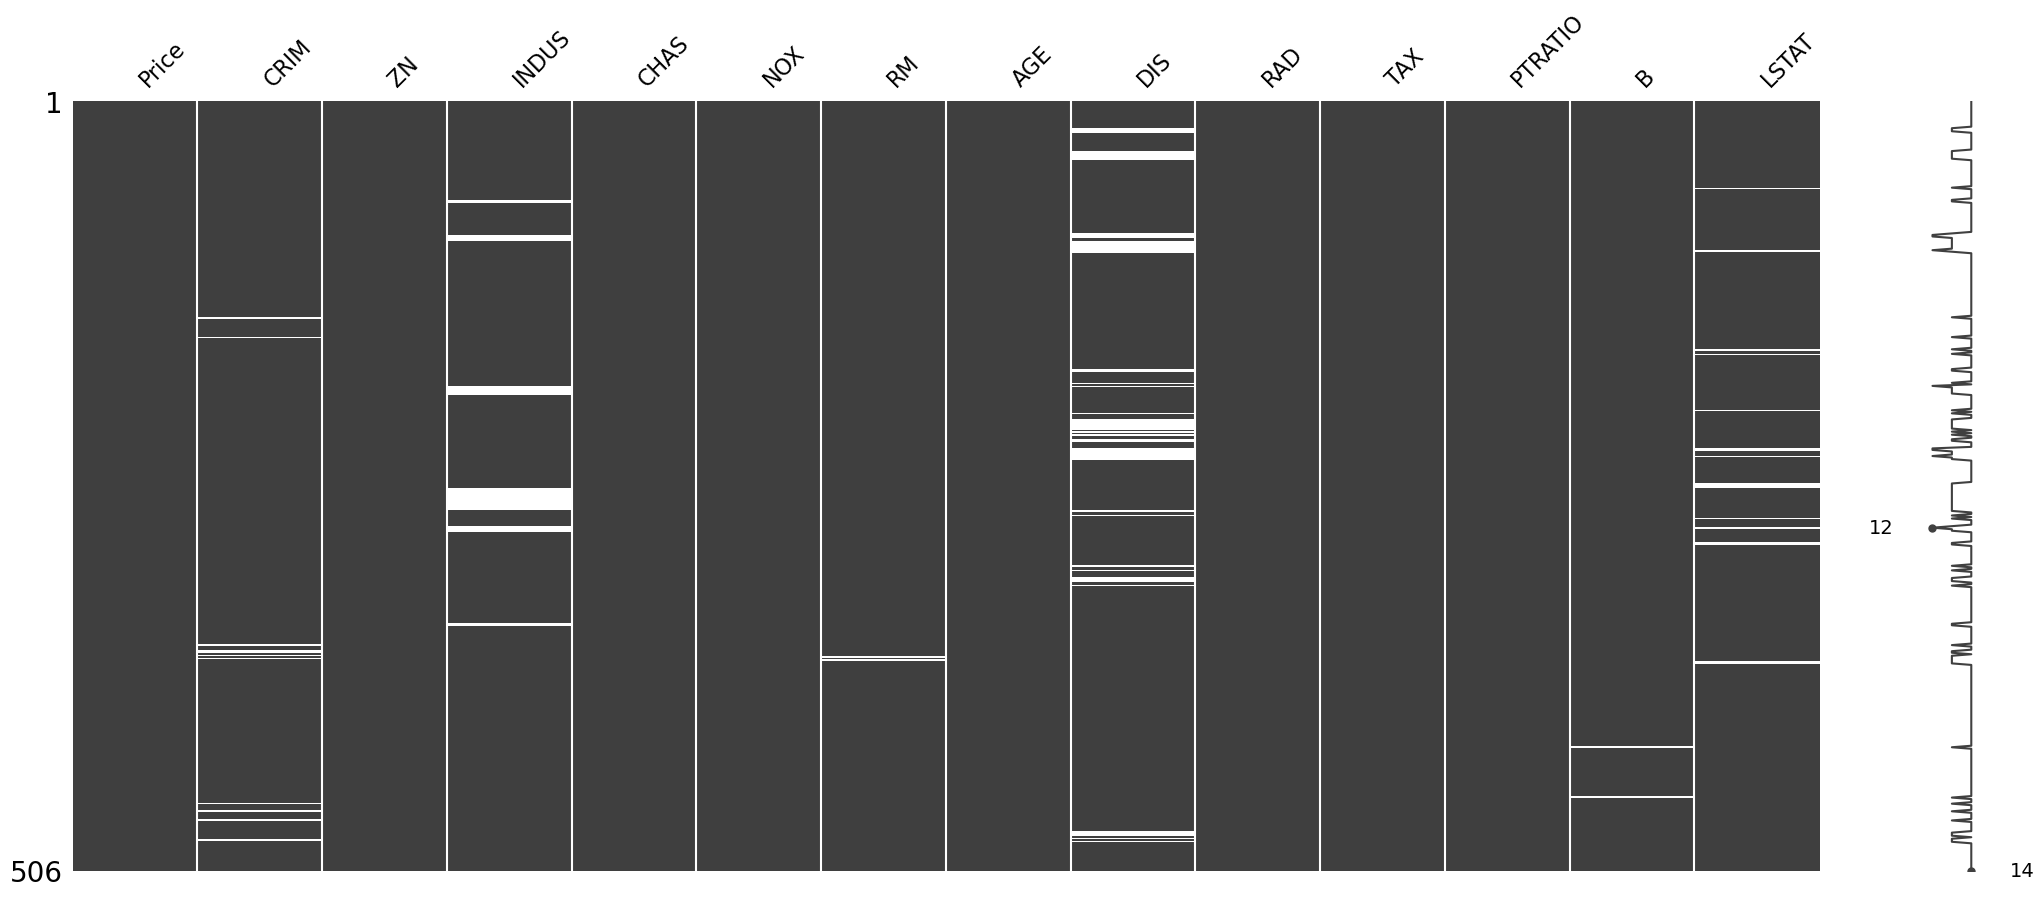

In [26]:
# Null Check
msno.matrix(df)
df.isnull().sum()

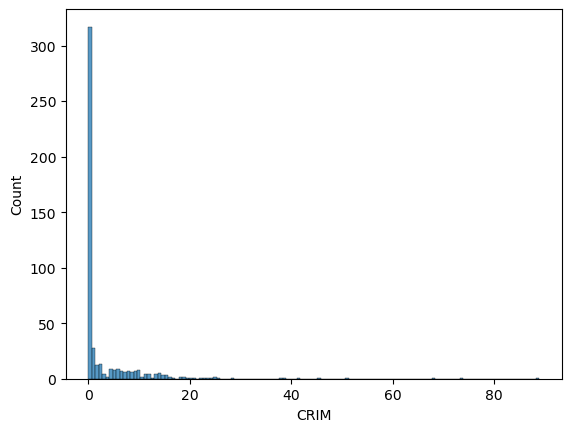

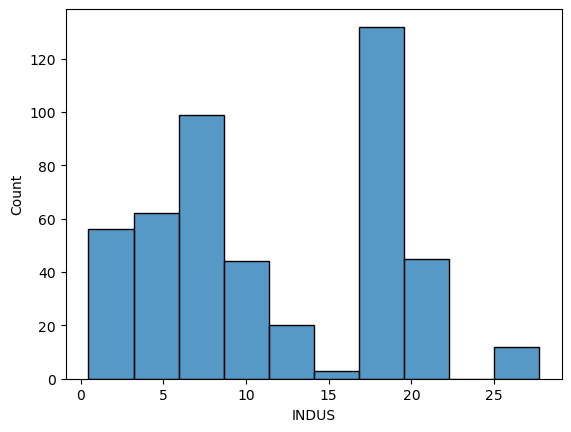

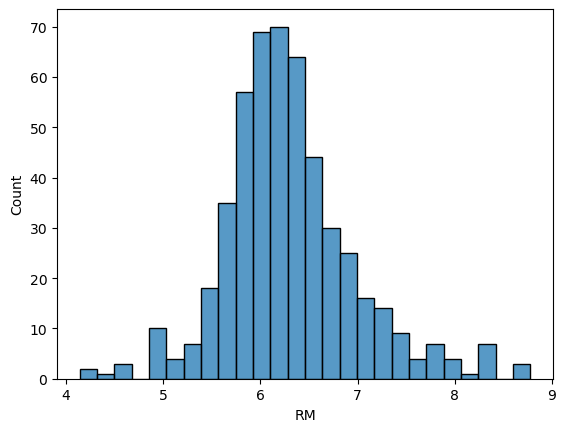

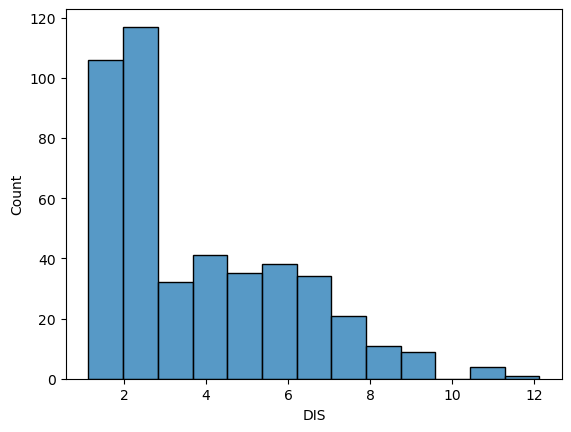

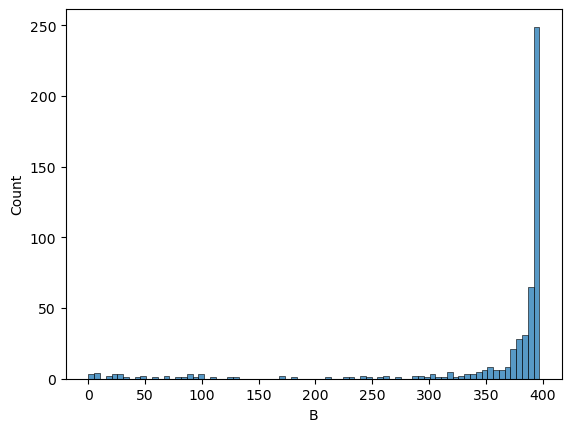

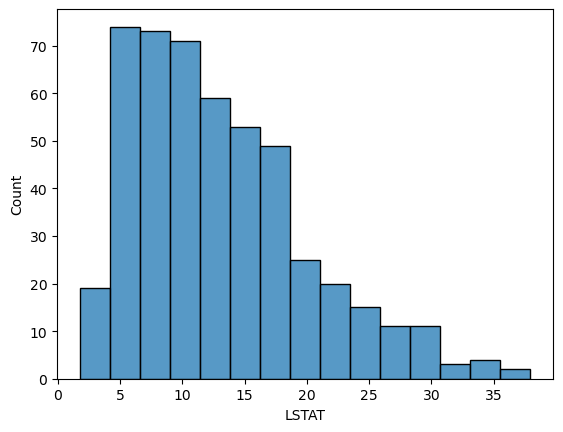

In [29]:
# Null Data
for i in df.columns[df.isnull().sum() != 0]:
    sns.histplot(data=df, x=i)
    plt.show()

In [20]:
# Data Type Preprocessing
def preprocess_type(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.replace("\'", "")
            df = df.astype({col: float})
    return df


df = preprocess_type(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1   CRIM     495 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    473 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      449 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        504 non-null    float64
 13  LSTAT    489 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Fuction
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()


In [43]:
# Set Variables & Split Data
# X_train, X_test, Y_train, Y_test 4 Group Split
# Dependent/Independent variables Split

def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]

    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname], 
                                                        test_size=0.2, random_state=123) # Test set ratio: 20%
    
    return X_train, X_test, Y_train, Y_test



Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)
display(X_test, Y_test)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.14,0.00,18.10,0,0.60,5.76,100.00,1.41,24,666,20.20,2.60,10.11
85,0.06,0.00,4.49,0,0.45,6.63,56.10,4.44,3,247,18.50,392.30,6.53
280,0.04,20.00,NaN,0,0.44,7.82,64.50,4.69,5,216,14.90,387.31,NaN
422,12.05,0.00,18.10,0,0.61,5.65,87.60,1.95,24,666,20.20,291.55,14.10
199,0.03,95.00,1.47,0,0.40,6.97,15.30,7.65,3,402,17.00,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0,0.50,6.55,21.40,NaN,8,307,17.40,380.34,NaN
159,1.43,0.00,19.58,0,0.87,6.51,100.00,1.77,5,403,14.70,364.31,7.39
196,0.04,80.00,1.52,0,0.40,7.29,34.10,7.31,2,329,12.60,396.90,4.08
345,0.03,0.00,4.39,0,0.44,6.01,48.50,8.01,3,352,18.80,385.64,10.53


,Price
410,15.00
85,26.60
280,45.40
422,20.80
199,34.90
...,...
229,31.50
159,23.30
196,33.30
345,17.50
